# Property price Prediction - Model Building

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

# label encoding : Using pd.get_dummies

# for handling sknerness
from scipy.stats import skew

# for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# scaling data
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
import statsmodels.api as stm
import scipy.stats as stats
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import VotingRegressor

# Evaluation matrix
from sklearn.metrics import r2_score,mean_squared_error

#importing pickle for saving model
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Exported Data\concatedTrainTest.csv",
               index_col=0,header=0)
print(df.shape)
df.head()

(2919, 215)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

# Splitting Data into Train and Test

In [3]:
train=df.loc[:1460,:]
test=df.loc[1461:,:]

In [4]:
print(train.shape)
train.head()

(1460, 215)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [5]:
train.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,953,694,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,8,2007,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
test.drop(["SalePrice"],axis=1,inplace=True)
print(test.shape)
test.head()

(1459, 214)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,270.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,6,2010,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
test.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,48,68.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,1092,0.0,0.0,1,1,3,1,5,0,1977.721217,0.0,0.0,0,0,0,6,2006,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

# Model Building

## Linear Regression

## Using Training dataset we can create X and Y

In [8]:
X=train.iloc[:,:-1]
Y=train.iloc[:,-1]

In [9]:
print("X=",X.shape)
print("Y=",Y.shape)

X= (1460, 214)
Y= (1460,)


In [10]:
print("Y minimum =",Y.min())
print("Y maximum =",Y.max())

Y minimum = 34900.0
Y maximum = 755000.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

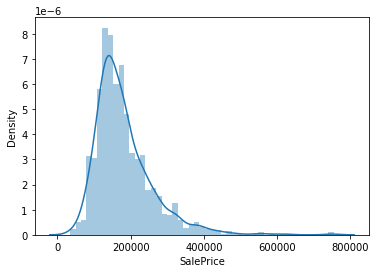

In [11]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

In [12]:
# Y_log  = np.log(Y)
# sns.distplot(Y_log,hist=True)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [14]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

# print (model_linear.intercept_)
# print (model_linear.coef_)

Y_pred=model_linear.predict(X_test)
print(Y_pred)

[161567.12441517 216429.58087849 133802.78933517 146361.82917291
 313303.66401225 280767.01651989 281707.60254335 105945.44615053
 197710.80741513 168013.63165984 141889.07588886 160623.22214798
 270249.37191955  89457.46917955 221097.5065614  192473.37745994
 289777.27877495 208421.41768805 202303.27383243 188366.6821153
 440739.85639992 111037.19053999 118109.00866245 119142.19794644
 170998.7021818  150108.69723088 197785.05135719  83974.94068806
 143166.43730783 204513.90819991  93686.19761249 155281.63715454
 125459.43198341 114893.87415668 141524.15952398  55300.61375925
 170604.91116419 218501.98810514 322784.58537361 151110.4638892
 203133.4185818  135309.91037974  83413.61838376 155110.66287908
 206437.15944877 221884.50780659 251235.54574482 139872.95806075
 113485.08403876 167269.27536793 208815.07321207  33410.41384959
 176458.95580928 120206.43147657 217113.05917804 147100.0206498
 191800.39241457 181911.60904824 151312.51371869 137887.07568147
 120376.31476486 198927.7920

In [15]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8675668415323975
27854.071182717384
0.8448032303580465


## Ridge Regression

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [17]:
model_ridge = Ridge()
model_ridge.fit(X_train,Y_train)

# print (ridge.intercept_)
# print (ridge.coef_)

Y_pred=model_ridge.predict(X_test)
print(Y_pred)

[162807.43830035 213298.39441299 141885.37958912 146080.63235531
 320947.42864084 252017.97848918 278139.66839068  97246.12418332
 191651.10363889 171108.02764092 138503.77536003 165176.88666383
 279210.91897836  95178.4533895  220200.73179488 185897.81009345
 289381.19004008 194437.50990336 205031.35028363 188560.26305907
 416067.34698462 114123.40361283 109955.4932664  111424.69575666
 215146.41566226 151155.88423783 189643.30076251  82549.80642309
 148882.56445372 200916.70097907 101763.13276906 156293.66634304
 125221.26638254 109906.20315139 147147.34631171  49025.43805574
 169724.91831966 218457.10298746 330884.14381249 144015.80936184
 201957.37743509 138558.501173    71037.52312257 154102.53551826
 204921.00609504 219171.01231305 245437.7751576  135795.72608394
 117667.64696604 160707.72515591 209331.01810139  31435.43457748
 180781.82759678 122105.36606089 218412.04350847 142641.23489561
 194119.65095396 183251.48060398 151468.40543298 132992.27151353
 122529.9376092  205367.9

In [18]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.873056218209157
27270.683862663438
0.8512361625439037


## Lasso Regression

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [20]:
model_lasso = Lasso()
model_lasso.fit(X_train,Y_train)

# print (lasso.intercept_)
# print (lasso.coef_)

Y_pred=model_lasso.predict(X_test)
print(Y_pred)

[161246.6188551  216384.40020318 134037.43655274 146468.11487503
 313313.8276005  280350.08424365 281549.51696008 105873.45179597
 197229.61299137 167880.11290632 141933.40097408 160891.26620323
 270160.62776306  89592.6373403  221109.61022243 192092.68136463
 289825.13977183 207572.64780321 202275.22680552 188390.55483873
 440438.79929796 111133.96519229 118045.68727653 119163.81286764
 173656.27053963 150319.48647654 197545.27134512  84003.87843778
 143240.80756286 204530.6815953   93668.68069882 155308.33771807
 125504.38901838 114872.00255092 141878.78900901  54852.61773497
 170533.4289733  218449.43626441 322759.24386744 150982.96914339
 203264.00633268 135382.51976701  83437.85674546 154980.33158372
 206438.35464772 221671.8114959  250716.18852758 138755.93463726
 113585.209709   167137.9920914  208798.26218595  33381.31570597
 176508.83134059 120410.56846724 217070.61137881 147037.9052386
 191914.4196399  181725.54098124 150978.76206966 136757.77161304
 120431.92726449 199492.27

In [21]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.878590176163423
26669.644528974957
0.8577213389738427


## OLS

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [23]:
new_df=pd.DataFrame()
new_df=X_train

new_df["Sale_Price"]=Y_train
new_df.shape

(1022, 215)

In [24]:
ols_model = sm.ols(formula='Y_train~ X_train', data=new_df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Y_train   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.492e+26
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:16:10   Log-Likelihood:                 17955.
No. Observations:                1022   AIC:                        -3.555e+04
Df Residuals:                     842   BIC:                        -3.466e+04
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.821e-10   4.66e-08     -0.012   

In [25]:
# Y_pred_new=ols_model.predict(X_test)

# r2=r2_score(Y_test,Y_pred_new)
# print(r2)

# rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
# print(rmse)

# adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
# print(adjusted_r_squared)

## Post model building assumption 

## Q-Q plot

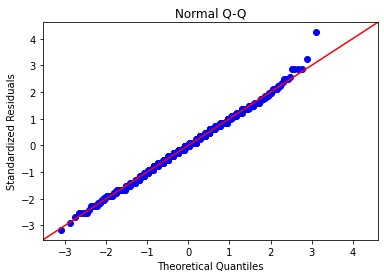

In [26]:
## Quantile-Quantile plots
res = ols_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

## Ensemble Model

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [28]:
estimators = []
model1= LinearRegression()
estimators.append(('lr', model1))

model2=Ridge()
estimators.append(('rid', model2))

model3=Lasso()
estimators.append(('las', model3))


# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)


[161873.72719021 215370.79183155 136575.20182568 146303.52546775
 315854.97341786 271045.02641757 280465.5959647  103021.67404327
 195530.50801513 169000.59073569 140775.41740766 162230.45833835
 273206.97288699  91409.51996978 220802.6161929  190154.62297267
 289661.20286229 203477.19179821 203203.28364053 188439.16667103
 432415.3342275  112098.18644837 115370.06306846 116576.90219025
 186600.46279457 150528.02264842 194991.2078216   83509.54184964
 145096.60310813 203320.43025809  96372.67036013 155627.88040522
 125395.02912811 113224.02661966 143516.76494823  53059.55651665
 170287.75281905 218469.509119   325475.99101784 148703.08079815
 202784.93411653 136416.97710659  79296.3327506  154731.17666035
 205932.17339718 220909.11053851 249129.83647667 138141.53959398
 114912.6469046  165038.33087175 208981.45116647  32742.38804435
 177916.53824889 120907.4553349  217531.90468844 145593.05359467
 192611.48766948 182296.21021116 151253.22707378 135879.03960268
 121112.72654618 201262.6

In [29]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8766111425869887
26886.129368743797
0.85540213416419


## K-Fold Validation

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [31]:
# regressor=LinearRegression()                # 0.7425700715256086 
regressor=Ridge()                             # 0.7812324864224415
# regressor = Lasso()                         # 0.7441316915643152
# regressor = VotingRegressor(estimators)     # 0.7616999046811099

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=regressor,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.88837222 0.88638058 0.80951061 0.85908177 0.44767309 0.91039457
 0.60407213 0.84321635 0.77504414 0.78857942]
0.7812324864224415


# Using Training dataset we can create X and Y

In [32]:
X=train.iloc[:,:-1]
Y=train.iloc[:,-1]

In [33]:
print("X=",X.shape)
print("Y=",Y.shape)

X= (1460, 214)
Y= (1460,)


In [34]:
print("Y minimum =",Y.min())
print("Y maximum =",Y.max())

Y minimum = 34900.0
Y maximum = 755000.0


## Scaling Data

In [35]:
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

## SGD Regressor

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [37]:
regressor_SGD=SGDRegressor(learning_rate="constant",eta0=0.01,shuffle=True,random_state=10,max_iter=1000,
                            early_stopping=True,n_iter_no_change=5)
regressor_SGD.fit(X_train,Y_train)


Y_pred=regressor_SGD.predict(X_test)

# print(list(zip(diabeties_rev.columns[:-1],regressor.coef_.ravel())))
# print(classifier.intercept_)
print(Y_pred)

[ 1.13273736e+12 -4.91298850e+11 -1.27156446e+12 -2.01298542e+11
  1.57539397e+11 -9.92652922e+11  5.90877717e+10 -6.91300925e+10
 -1.10693399e+12 -1.32585460e+11 -7.83031847e+11 -5.80335571e+10
 -9.34580946e+11  1.33460055e+12 -8.68681639e+11  1.09768005e+12
 -2.49111283e+10 -5.68725566e+11 -9.94857506e+10 -3.58293193e+11
  3.65995476e+11  2.36837845e+11 -6.06309867e+11  9.39406747e+11
 -2.79882287e+12 -9.83320118e+11 -2.45052195e+11  5.97431722e+11
 -5.12496556e+11 -1.34456922e+11 -4.36531910e+09 -4.02785687e+11
 -2.64797155e+11  1.53010988e+12  1.13000045e+11  1.90060889e+12
  3.03887860e+11 -6.55734235e+11 -1.87286123e+11  2.38989293e+11
 -8.58122132e+11  6.80941108e+11  7.84481145e+11  1.01287760e+12
  3.46421050e+10 -4.82421874e+11  6.75061976e+11  1.67000843e+12
 -1.08460277e+12 -3.06656095e+11 -1.04848705e+12  1.05641620e+12
 -9.87696333e+11 -2.71225739e+11 -6.09511363e+11 -6.87265086e+11
 -6.14539173e+11 -4.19972724e+11 -5.62787786e+11  1.11525413e+12
  1.97454267e+11  2.99757

In [38]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

-179658339714461.8
1025921198354.3046
-210539371601124.5


## Tune SGD Regressor

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [40]:
regressor_SGD_tune=SGDRegressor(learning_rate="constant",eta0=0.001,shuffle=True,random_state=10,max_iter=1000,
                            early_stopping=True,n_iter_no_change=60)
regressor_SGD_tune.fit(X_train,Y_train)


Y_pred=regressor_SGD_tune.predict(X_test)

# print(list(zip(diabeties_rev.columns[:-1],regressor.coef_.ravel())))
# print(classifier.intercept_)
print(Y_pred)

[ 155249.16217438  225210.51426569  144351.7175777   151499.53453778
  305059.62786988  259021.3021182   274706.73607245  109883.17790861
  199608.29727564  178048.5127071   129421.36698101  159459.40632843
  272281.36654495   87753.18517138  228346.51671842  187373.95889474
  294594.33343659  210611.79315629  203079.16127886  193886.02357502
  456425.71325513  114666.90739196  121086.54893186  111020.46495144
  182380.87601551  143210.46610097  192120.99585833   85826.42934427
  153260.54111365  198677.03309695   96505.01973799  154808.65723653
  128252.01487136  120921.70984383  149779.02890519   70751.94450149
  168612.50280887  218859.28988028  328701.49646493  151662.02387551
  203978.00350118  133878.82564053   85672.42259396  156995.19210584
  211975.27286674  232141.03966643  254082.41234832  141897.94550076
  116737.83713609  171291.04531423  212344.5899581    42297.3774554
  176135.478224    125849.60811272  220165.16645369  146911.88447733
  197695.82144956  190181.98551614 

In [41]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.754152788985335
37950.97655134678
0.7118947141603242


## KNN

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [43]:
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [44]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7199619338801369
40504.0870363407
0.671826876731823


In [45]:
int(np.sqrt(len(X_train)))

31

## Tune KNN

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [47]:
model_KNN_tune=KNeighborsRegressor(n_neighbors=6,metric='euclidean')

model_KNN_tune.fit(X_train,Y_train)
Y_pred=model_KNN_tune.predict(X_test)

In [48]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7720755759336522
36541.44740277056
0.7328982050499586


## SVM

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [50]:
svm_model=SVR(kernel='linear',C=1,gamma=0.01)

svm_model.fit(X_train, Y_train)
Y_pred=svm_model.predict(X_test)

print(list(Y_pred))

[158094.7721690026, 176203.13502409484, 154459.86892205535, 165053.34884344586, 185446.1164206572, 182895.72223969252, 177217.67002572273, 150150.25794558827, 176169.7169810464, 157802.8539615609, 167455.7963709868, 165685.96908050514, 181559.78325110563, 150636.33629728682, 177638.93249577426, 167134.83610236002, 179775.00285536813, 158734.29129164355, 173553.22704125315, 176215.7521562209, 187425.91980296935, 153864.18938497023, 154359.72178790247, 149716.5982575965, 166775.7738999951, 167403.39379657933, 156260.8392435363, 143520.25452266412, 156025.8566379479, 169312.56643124748, 146671.23977993953, 168562.7954236012, 159513.41163757155, 153656.325147777, 159104.29126919378, 143544.79440482627, 157905.33653972394, 175878.2859986797, 185680.86060212177, 154266.6153389103, 175621.58427814304, 150105.46256877785, 148499.09418420083, 155285.02353385417, 177406.64102065255, 173200.8923718629, 172106.816283298, 157400.2615699259, 154903.6339064929, 172802.1506819562, 172702.97111044044, 

In [51]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.21045257689198993
68011.04108548407
0.0747392045665971


## Tune SVM

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [53]:
model_SVM_tune=SVR(kernel='linear',C=300,gamma=0.01)

model_SVM_tune.fit(X_train, Y_train)
Y_pred=model_SVM_tune.predict(X_test)

print(list(Y_pred))

[169017.6475325771, 212653.43299298332, 132033.88422809093, 156499.3541447962, 307383.92839336925, 252232.1045793391, 271211.7935240108, 105876.89555234351, 186273.26715201512, 165727.04456418916, 139029.2912156254, 170962.20924346516, 264100.3666026549, 103498.61483461551, 211789.99735818055, 183993.78182603684, 270294.7976381318, 148882.46020317124, 204167.4012988398, 179548.36644023962, 418009.0321241552, 116480.15165797307, 113827.1514242625, 115298.66965921529, 248203.19703252532, 162559.20927004478, 205348.89603769136, 92263.80599655563, 143871.32919907878, 197541.3960986755, 96384.7307082924, 155908.0347765457, 129526.41545314135, 124387.3012564202, 157835.3005812638, 59872.66424953856, 170796.4744628236, 218934.7953400552, 311586.2646360316, 145154.05487454456, 208507.77309290526, 127942.26323536973, 92660.37694660609, 152945.68749409568, 206294.96623754973, 229783.30481613305, 261644.15993956418, 135636.2714489132, 112563.07824980275, 165079.9736501495, 203953.78371382086, 440

In [54]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8908026160876706
25292.77203015805
0.8720329452786437


## Decision Tree

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [56]:
model_DecisionTree=DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best')

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

print(Y_pred)

[185000. 196500. 143000. 168500. 303477. 303477. 229456. 103000. 178740.
 135000. 181000. 165000. 319000. 131500. 155835. 187500. 370878. 144000.
 210000. 181134. 315000. 123500. 139000.  83000. 185000. 165000. 259500.
  58500. 127000. 200000. 110000. 144152. 155000. 140200. 147000.  73000.
 136000. 225000. 315000. 165000. 210000. 106250.  89471. 184000. 190000.
 205000. 234000. 152000. 112000. 173733. 211000.  84000. 163990. 139000.
 240000. 138000. 184900. 176432. 122000. 152000. 141000. 265900. 154500.
 167000. 214000. 197000. 233000. 176432. 112500. 163990.  80000. 124000.
 124000. 132000. 163990. 319000. 190000. 115000. 110000. 202665. 339750.
 181000. 164000. 180500. 164900. 140000. 181000. 148500. 228500. 160000.
 127000. 124000. 124000. 155000. 179900. 144000. 225000. 237500. 214500.
 265900. 205000. 168500. 116500. 120500. 126000. 394432. 237500. 256000.
 118400. 142500. 185000. 239000. 145000. 103000.  80000. 165500. 328900.
 315000.  88000.  90000. 155900. 328900. 112500. 13

In [57]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6770772109697629
43495.03253684584
0.6215708038593446


## Tune Decision Tree

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [59]:
model_DecisionTree_tune=DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best',
                                             min_samples_leaf=8,max_depth=15,min_samples_split=3,max_leaf_nodes=100)

model_DecisionTree_tune.fit(X_train,Y_train)
Y_pred=model_DecisionTree_tune.predict(X_test)

print(Y_pred)

[174310.         196175.         141494.41666667 125396.27272727
 288656.23076923 288656.23076923 255251.7        103294.44444444
 176460.125      143581.81818182 168615.38461538 161875.
 255251.7        123215.58333333 182437.5        217864.28571429
 287165.88888889 146257.85714286 205391.         212534.64285714
 330317.88888889 107147.92857143 136468.75        96611.11111111
 174310.         161875.         178094.92307692  74228.58333333
 178094.92307692 212283.33333333 102953.66666667 150672.44444444
 141494.41666667 123215.58333333 141565.625       74228.58333333
 138688.63636364 222494.7        344250.         136468.75
 223633.33333333  74228.58333333 107147.92857143 212283.33333333
 206403.57142857 212283.33333333 242748.9        151076.92307692
 108600.         122400.         217864.28571429  74228.58333333
 173162.5        125396.27272727 232558.75       139312.5
 196175.         177556.54545455 123126.66666667 151076.92307692
 136468.75       205391.         152155.555555

In [60]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7590614065282832
37570.19922709494
0.7176470619476025


## Random Forest

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [62]:
model_RandomForest=RandomForestRegressor(n_estimators=10, random_state=10)

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [63]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.842189362959934
30405.94104933319
0.8150636791634889


## Tune Random Forest

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [65]:
model_RandomForest_tune=RandomForestRegressor(n_estimators=50, random_state=10)

model_RandomForest_tune.fit(X_train,Y_train)

Y_pred=model_RandomForest_tune.predict(X_test)

In [66]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8526178477614013
29384.124796558066
0.8272846906697867


## Ensemble Model

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [68]:
estimators = []
# model2=SGDRegressor(learning_rate="constant",eta0=0.0001,shuffle=True,random_state=10,max_iter=1000,
#                             early_stopping=True,n_iter_no_change=60)
# estimators.append(('sgd', model2))



# model3 = KNeighborsRegressor(n_neighbors=6,metric='euclidean')
# estimators.append(('knn', model3))



model4 = SVR(kernel='linear',C=300,gamma=0.01)
estimators.append(('svm', model4))



# model5 = DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best',min_samples_leaf=6,max_depth=10,
#                                min_samples_split=2,max_leaf_nodes=200)
# estimators.append(('cart', model5))



model6=RandomForestRegressor(n_estimators=50, random_state=10)
estimators.append(('rt', model6))


# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)


[166482.82376629 205235.89649649 127429.02211405 156377.1770724
 315870.87419668 273699.02228967 255207.43676201 111550.44777617
 190931.03357601 162370.92228209 155477.04560781 168248.10462173
 272694.01330133 112187.55741731 193984.33867909 180768.39091302
 292437.20881907 148494.23010159 205593.17064942 182877.41322012
 391401.88606208 121195.57582899 123564.40571213 111302.58482961
 223317.29851626 163720.60463502 198252.53801885  90693.40299828
 143129.56459954 201210.69804934 102249.61535415 155521.27738827
 129869.20772657 135322.26062821 145416.30029063  72555.33212477
 156688.62723141 215477.29767003 313053.38231802 144883.52743727
 215784.44654645 121960.88161768  99417.8984733  154616.94374705
 203808.49311877 231291.55240807 252439.42996978 140752.74572446
 119401.5391249  160932.41682507 200531.39185691  63003.67461506
 178936.63878773 132907.3357744  214779.99691446 144634.0704926
 193588.50440059 179174.69461643 135390.17915871 140992.08019722
 128764.25811002 213065.923

In [69]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8890446026700712
25495.55845277843
0.869972751241473


## K-Fold validation

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [71]:
# regressor=SVR(kernel='linear',C=300,gamma=0.01)                              # 0.8214846070417453
# regressor=RandomForestRegressor(n_estimators=50, random_state=10)            # 0.8232713480547218
regressor = VotingRegressor(estimators)                                        # 0.8456291037128455

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=regressor,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.91593103 0.87863308 0.84299964 0.85967876 0.76037014 0.90166048
 0.74656282 0.81780363 0.88314222 0.84950925]
0.8456291037128455


# Applying operation on Test data

In [72]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,270.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,6,2010,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [74]:
X_test_new  = test.values[:,:]

In [75]:
X_test_new  = scaler.transform(X_test_new )
print(X_test_new)

[[-1.00338652  0.83505035  0.75428065 ... -0.11785113  0.4676514
  -0.30599503]
 [-1.00338652  0.90972688  1.60045284 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.41771676  0.38699119  1.46065048 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [-1.00338652 -0.06106797 -0.01767152 ... -0.11785113 -2.13834494
  -0.30599503]
 [ 1.30590632 -0.50912713  0.37646237 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.41771676  0.38699119  0.11605248 ... -0.11785113  0.4676514
  -0.30599503]]


### Note:-  if you got error in this block then please Rerun Ensemble model and then run this block again

In [76]:
Y_pred_new=ensemble.predict(X_test_new)

In [77]:
print(Y_pred_new)

[121600.66408261 162808.08261437 176350.18950589 ... 151504.45809136
 111441.5796277  235354.44599306]


In [78]:
print(Y_pred_new.shape)

(1459,)


# Importing in Submission File

In [79]:
# importing submission file
file=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\sample_submission.csv",header=0)
print(file.shape)
file.tail()

(1459, 2)


,Id,SalePrice
1454,2915,81396.316363
1455,2916,74496.702326
1456,2917,151504.458091
1457,2918,111441.579628
1458,2919,235354.445993


In [80]:
file.columns

Index(['Id', 'SalePrice'], dtype='object')

In [81]:
file["SalePrice"]=Y_pred_new

In [82]:
print(file.shape)
file.head()

(1459, 2)


,Id,SalePrice
0,1461,121600.664083
1,1462,162808.082614
2,1463,176350.189506
3,1464,190156.613816
4,1465,195036.346989


In [83]:
file.to_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\sample_submission.csv",header=True,index=False)

# Dumping Models

In [84]:
# saving model:
pickle.dump(regressor_SGD,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\sgd.pkl','wb'))
pickle.dump(regressor_SGD_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\sgd_tune.pkl','wb'))
pickle.dump(model_KNN,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\knn.pkl','wb'))
pickle.dump(model_KNN_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\knn_tune.pkl','wb'))
pickle.dump(svm_model,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\svm.pkl','wb'))
pickle.dump(model_SVM_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\svm_tune.pkl','wb'))
pickle.dump(model_DecisionTree,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\dt.pkl','wb'))
pickle.dump(model_DecisionTree_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\dt_tune.pkl','wb'))
pickle.dump(model_RandomForest,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\rt.pkl','wb'))
pickle.dump(model_RandomForest_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\rt_tune.pkl','wb'))
pickle.dump(ensemble,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\ensemble.pkl','wb'))
pickle.dump(model_linear,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\linear.pkl','wb'))
pickle.dump(model_ridge,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\ridge.pkl','wb'))
pickle.dump(model_lasso,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\lasso.pkl','wb'))
pickle.dump(ols_model,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\ols.pkl','wb'))